# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.4.1'

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt


In [63]:
import io
from google.colab import files
upoaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [64]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19       

In [65]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [66]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [67]:
x = df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values

In [68]:
x.astype('float32')

array([[ 3.000e+00,  8.860e+01,  1.688e+02, ...,  5.000e+03,  2.100e+01,
         2.700e+01],
       [ 3.000e+00,  8.860e+01,  1.688e+02, ...,  5.000e+03,  2.100e+01,
         2.700e+01],
       [ 1.000e+00,  9.450e+01,  1.712e+02, ...,  5.000e+03,  1.900e+01,
         2.600e+01],
       ...,
       [-1.000e+00,  1.091e+02,  1.888e+02, ...,  5.500e+03,  1.800e+01,
         2.300e+01],
       [-1.000e+00,  1.091e+02,  1.888e+02, ...,  4.800e+03,  2.600e+01,
         2.700e+01],
       [-1.000e+00,  1.091e+02,  1.888e+02, ...,  5.400e+03,  1.900e+01,
         2.500e+01]], dtype=float32)

In [69]:
y= df[['price']].values

In [70]:
y.astype('float32')

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.168],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [71]:
x.shape

(205, 14)

In [72]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_label, test_label = train_test_split(x, y, test_size=0.30, random_state=42)

In [73]:
train_label

array([[11248. ],
       [16503. ],
       [10698. ],
       [ 6855. ],
       [20970. ],
       [ 7295. ],
       [22018. ],
       [10345. ],
       [ 6938. ],
       [18150. ],
       [ 7603. ],
       [ 6095. ],
       [16695. ],
       [ 9538. ],
       [12945. ],
       [12764. ],
       [ 6669. ],
       [ 7957. ],
       [ 7609. ],
       [18620. ],
       [16845. ],
       [18150. ],
       [16500. ],
       [ 6189. ],
       [11048. ],
       [ 7609. ],
       [34028. ],
       [ 6989. ],
       [ 5118. ],
       [ 7295. ],
       [17075. ],
       [10595. ],
       [ 6377. ],
       [15510. ],
       [13845. ],
       [ 6529. ],
       [16925. ],
       [18950. ],
       [ 8058. ],
       [17710. ],
       [ 8558. ],
       [32528. ],
       [15985. ],
       [ 7126. ],
       [17450. ],
       [ 5399. ],
       [12440. ],
       [ 9495. ],
       [16630. ],
       [ 8013. ],
       [16430. ],
       [10245. ],
       [ 5572. ],
       [ 5348. ],
       [11199. ],
       [13

In [74]:
train_x.shape

(143, 14)

In [75]:
test_label.shape

(62, 1)

In [76]:
test_x.shape

(62, 14)

In [77]:
train_label.shape

(143, 1)

In [78]:
mean=train_x.mean(axis=0)
train_x-=mean
std=train_x.std(axis=0)
train_x/=std
test_x-=mean
test_x/=std


In [79]:
train_x.shape

(143, 14)

In [80]:
from keras import models
from keras import layers
from keras import regularizers
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(10,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(train_x.shape[1],)))
  model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
  model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [81]:
k=4
samples=len(train_x)//k
num_epochs=500
all_scores=[]
all_mae_history=[]
for i in range (k):
  print('proccessing fold #',i)
  validation_x=train_x[i*samples:(i+1)*samples]
  validation_label=train_label[i*samples:(i+1)*samples]
  partial_train_x=np.concatenate([train_x[:i*samples],train_x[(i+1)*samples:]],axis=0)
  partial_train_label=np.concatenate([train_label[:i*samples],train_label[(i+1)*samples:]],axis=0)
  model= build_model()
  history=model.fit(partial_train_x, partial_train_label, epochs=num_epochs, batch_size=1,verbose=0)
  validation_mse, validation_mae=model.evaluate(validation_x,validation_label,verbose=0)
  all_scores.append(validation_mae)
  mae_history=history.history['mae']
  all_mae_history.append(mae_history)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3


In [82]:
average_mae_history=[np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
print('All fold validation Errors:', all_scores)
print('Mean of all fold Validation Errors:', np.mean(all_scores))
print('Average_mae_histories: ', all_mae_history)

All fold validation Errors: [1734.9615478515625, 2414.328369140625, 2628.300048828125, 1883.5921630859375]
Mean of all fold Validation Errors: 2165.2955322265625
Average_mae_histories:  [[13765.8525390625, 13765.412109375, 13764.529296875, 13762.80078125, 13759.6982421875, 13754.6953125, 13746.2802734375, 13734.056640625, 13715.076171875, 13689.1884765625, 13653.216796875, 13604.443359375, 13541.26171875, 13461.35546875, 13365.2587890625, 13241.2353515625, 13098.720703125, 12925.4501953125, 12723.3876953125, 12489.3955078125, 12214.0791015625, 11897.7021484375, 11538.3349609375, 11144.94921875, 10660.5458984375, 10144.5517578125, 9539.4326171875, 8947.236328125, 8302.4130859375, 7683.234375, 7042.998046875, 6424.4697265625, 5818.19970703125, 5183.9072265625, 4636.28955078125, 4137.58984375, 3763.903564453125, 3582.035888671875, 3462.68603515625, 3398.408935546875, 3343.242431640625, 3290.088623046875, 3244.57861328125, 3193.668212890625, 3152.84521484375, 3112.562255859375, 3075.095214

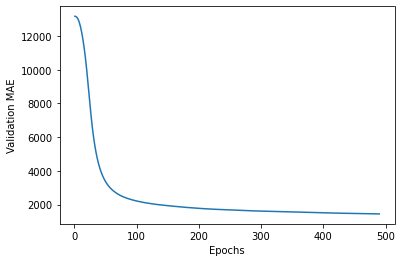

In [83]:
def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smoothed_mae_history= smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smoothed_mae_history)+1),smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [84]:
model=build_model()
model.fit(train_x,train_label, epochs=500, batch_size=4,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_x,test_label)
print(test_mae_score)

2/2 [==============================] - 0s 11ms/step - loss: 10276172.0000 - mae: 2264.0054
2264.00537109375
